# <center> <span style="color:lightblue">**Gradient Descent**</span>


In [29]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

In [30]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

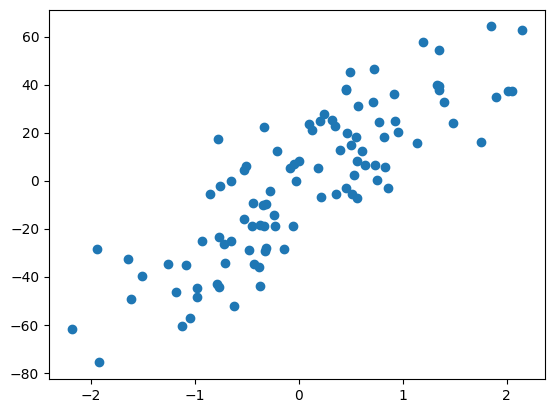

In [31]:
plt.scatter(X,y)

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [33]:
lr = LinearRegression()

In [34]:
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783825


In [35]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.6345158782661012

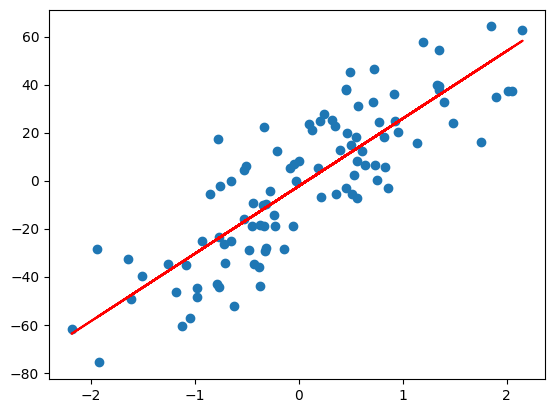

In [36]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red')


In [37]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)
        
    def predict(self,X):
        return self.m * X + self.b
    

In [38]:
gd = GDRegressor(0.001,50)

In [39]:
gd.fit(X_train,y_train)

28.159367347119066 -2.3004574196824854


In [40]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6343842836315579

# Using SKLearn


In [41]:
SGD=SGDRegressor(max_iter=100,learning_rate="constant",eta0=0.01)


In [42]:
SGD.fit(X_train,y_train)

SGDRegressor(learning_rate='constant', max_iter=100)

In [43]:
y_pred=SGD.predict(X_test)

In [44]:
r2_score(y_test,y_pred)

0.6348472752955585